#Claim Validation using GloVe and ELMo

In [0]:
mkdir data

In [0]:
cd data

/content/data


In [0]:
!pip install allennlp

In [0]:
!wget https://s3-eu-west-1.amazonaws.com/fever.public/wiki-pages.zip

In [0]:
!wget https://www.dropbox.com/s/69cma05v3w4oc8m/liar_train_raw.tsv && wget https://www.dropbox.com/s/lytkzczsgxbzblc/liar_valid_raw.tsv && wget https://www.dropbox.com/s/tsxon4egz7zrw5g/liar_test_raw.tsv

In [0]:
!unzip wiki-pages.zip

In [0]:
!wget https://s3-eu-west-1.amazonaws.com/fever.public/train.jsonl && wget https://s3-eu-west-1.amazonaws.com/fever.public/shared_task_dev.jsonl && wget https://s3-eu-west-1.amazonaws.com/fever.public/shared_task_test.jsonl

In [0]:
#!wget https://www.dropbox.com/s/mppyapxxsot4iwi/notun_test.json && wget https://www.dropbox.com/s/jgd2h66q30trcb1/notun_test%281%29.json && wget https://www.dropbox.com/s/budq6n9bf0evvjp/notun_test%282%29.json

In [0]:
#!wget https://www.dropbox.com/s/520hlodlrq1bxoi/abar_notun_test.json && wget https://www.dropbox.com/s/6vvawj63av96dss/abar_notun_test%281%29.json && wget https://www.dropbox.com/s/zy0lav043dxnj06/abar_notun_test%282%29.json

In [0]:
!wget https://www.dropbox.com/s/o0jyunks2ogq1fw/notun_test%283%29.json && wget https://www.dropbox.com/s/ok06k565hp66ww9/notun_test1.json && wget https://www.dropbox.com/s/xqwnyn7lz686y7y/notun_test2.json

In [0]:
!wget https://www.dropbox.com/s/vxsyq9oaymheusg/notun_test_tfidf.json && wget https://www.dropbox.com/s/l2uxmkbtlq52b04/notun_test_tfidf1.json && wget https://www.dropbox.com/s/5psgs084s9bcyq5/notun_test_tfidf2.json

In [0]:
!wget https://www.dropbox.com/s/2i9au4qcmjcdmn5/liar_final_train.json && wget https://www.dropbox.com/s/z1ans2eumj5kj1s/liar_final_valid.json && wget https://www.dropbox.com/s/2pb0tyhq9udpilz/liar_final_test.json

In [0]:
!wget http://nlp.stanford.edu/data/glove.6B.zip && wget https://nlp.stanford.edu/projects/snli/snli_1.0.zip

In [0]:
!unzip glove.6B.zip && unzip snli_1.0.zip

In [0]:
!pip install -U gensim

In [0]:
ls

In [0]:
!wget https://s3.amazonaws.com/dl4j-distribution/GoogleNews-vectors-negative300.bin.gz

In [0]:
!gunzip -f GoogleNews-vectors-negative300.bin.gz

In [0]:
!wget https://www.dropbox.com/s/05on2t6edciczx3/valid.tsv && wget https://www.dropbox.com/s/sp81ovwrovozz53/train.tsv && wget https://www.dropbox.com/s/sggvga937n8a2xx/test.tsv

In [0]:
!wget https://www.dropbox.com/s/i10hwbu5ipieyi1/custom_attention.py && wget https://www.dropbox.com/s/liqcu08falbk08d/tdd.py

In [0]:
!wget https://www.dropbox.com/s/7gimyx4jye1yy9p/train_new.json && wget https://www.dropbox.com/s/0flyx49xvrx74r2/val_new.json && wget https://www.dropbox.com/s/yw5lt0sc67idu45/test_new.json

In [0]:
!ln -sf /opt/bin/nvidia-smi /usr/bin/nvidia-smi
!pip install gputil
!pip install psutil
!pip install humanize
import psutil
import humanize
import os
import GPUtil as GPU
GPUs = GPU.getGPUs()
# XXX: only one GPU on Colab and isn’t guaranteed
gpu = GPUs[0]
def printm():
 process = psutil.Process(os.getpid())
 print("Gen RAM Free: " + humanize.naturalsize( psutil.virtual_memory().available ), " | Proc size: " + humanize.naturalsize( process.memory_info().rss))
 print("GPU RAM Free: {0:.0f}MB | Used: {1:.0f}MB | Util {2:3.0f}% | Total {3:.0f}MB".format(gpu.memoryFree, gpu.memoryUsed, gpu.memoryUtil*100, gpu.memoryTotal))


In [0]:
printm()

In [0]:
# Importing necessary libraries
import numpy as np
import os
from os.path import join, exists, split
import glob
import cv2
import json
import datetime
import re
import string
import random
import copy
import nltk
import itertools
from collections import Counter
import matplotlib.pyplot as plt
import pandas as pd
import pickle
import tensorflow as tf
from gensim.models import word2vec
from gensim.models import Word2Vec
from gensim.utils import simple_preprocess
from gensim.models.keyedvectors import KeyedVectors
from keras.utils import to_categorical
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras.layers import Embedding, Lambda, Input, Bidirectional,  Add, CuDNNGRU, Concatenate, Dropout, GRU, LSTM, Dense, Activation, ZeroPadding2D, BatchNormalization, Flatten, Conv2D,Conv1D, AveragePooling2D, AveragePooling1D,MaxPooling2D, MaxPooling1D, GlobalMaxPooling2D
from keras.models import Model, load_model, Sequential
from keras.preprocessing import image
from keras.preprocessing.image import ImageDataGenerator
from keras.utils import layer_utils, plot_model
from keras.utils.data_utils import get_file
from keras.applications.imagenet_utils import preprocess_input
from keras.applications import InceptionV3
from keras.callbacks import ModelCheckpoint, ReduceLROnPlateau
from keras import backend as K
from keras.initializers import glorot_uniform
from __future__ import print_function
import keras
from keras import backend as k
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import skimage
import six
import scipy

Using TensorFlow backend.


### Load the dataset from json files

In [0]:
def loadData(path):
  
  dataset=[]
  with open('snli_1.0/snli_1.0_'+path+'.jsonl', 'r') as f:
    dataset = f.read().split('\n')
    dataset.pop()

  for i in range(len(dataset)):
    dataset[i] = json.loads(dataset[i])

  sent1 = []
  sent2 = []
  label=[]
  
  for i in dataset:
    sent1.append(i['sentence1'].lower())
    sent2.append(i['sentence2'].lower())
   
    m = i['gold_label']
    if m == 'entailment':
      label.append(0)
    elif m == 'neutral':
      label.append(1)
    else:
      label.append(2)
  ''' 
  for i in dataset: 
    m = i['gold_label']
    if m == 'entailment':
      label.append(0)
      sent1.append(i['sentence1'].lower())
      sent2.append(i['sentence2'].lower())
    elif m == 'contradiction':
      label.append(1)
      sent1.append(i['sentence1'].lower())
      sent2.append(i['sentence2'].lower())
  '''
  
  return sent1, sent2, label

In [0]:
time_t = datetime.datetime.utcnow()
X_train_sent1, X_train_sent2, Y_train_label = loadData('train')
X_val_sent1, X_val_sent2, Y_val_label = loadData('dev')
X_test_sent1, X_test_sent2, Y_test_label = loadData('test')
print(datetime.datetime.utcnow() - time_t)

0:00:13.348653


##Tokenizer functions

In [0]:
from sklearn.feature_extraction.text import TfidfVectorizer
from nltk.stem.porter import PorterStemmer
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords
from nltk.tag import pos_tag
from sklearn.metrics.pairwise import cosine_similarity
import unicodedata

nltk.download('punkt')
nltk.download('wordnet')
nltk.download('stopwords')
nltk.download('averaged_perceptron_tagger')

stop = list(set(stopwords.words('english')))
stop.remove('nor')
stop.remove('not')
stop.remove('no')
stemmer = PorterStemmer()
lemmatizer = WordNetLemmatizer()

def strip_accents(text):
    try:
        text = unicode(text, 'utf-8')
    except (TypeError, NameError): # unicode is a default on python 3 
        pass
    text = unicodedata.normalize('NFD', text)
    text = text.encode('ascii', 'ignore')
    text = text.decode("utf-8")
    return str(text)
  
def stem_tokens(tokens, stemmer):
    stemmed = []
    for item in tokens:
      stemmed.append(stemmer.stem(item))
    return stemmed
def lemmatize_tokens(tokens, lemmatizer):
    lemmatized=[]
    for word, tag in pos_tag(tokens):
      temp = '0'
      if tag.startswith("NN"):
          temp =  lemmatizer.lemmatize(word, pos='n')
      elif tag.startswith('VB'):
          temp = lemmatizer.lemmatize(word, pos='v')
      elif tag.startswith('JJ'):
          temp = lemmatizer.lemmatize(word, pos='a')
      else:
          temp = word
      lemmatized.append(temp)
    return lemmatized

def tokenize(text):
    b = ['-lrb-', '-rrb-', '-rsb-', '-lsb-', '-lcb-', '-rcb-']
    text = text.lower()
    text = re.sub("\'"+'[A-Za-z]*', '', text)
    text = strip_accents(text)
    tokens = nltk.word_tokenize(text)
    tokens = [token for token in tokens if token not in string.punctuation and token not in b and token not in stop and len(token)>2 and not token.isdigit()]
    #stems = lemmatize_tokens(tokens, lemmatizer)
    return tokens
  
def preprocess(listt):
    new_list=[]
    for i in listt:
      z = tokenize(i)
      #z = ' '.join(x for x in z)
      new_list.append(z)
    print('Preprocess done.')
    return new_list 
  
def pad_sentence(listt, length):
    new_list = []
    max = 0
    for string in listt:
      if len(string)>max:
        max = len(string)
     
    if length < max:
      max = length
    print("Maximum sequence length: "+str(max))
    for string in listt:
      z = max - len(string)
      if z > 0:
        temp = string + ['<PAD/>']*z
      else:
        temp = string[0:max]
      new_list.append(temp)
    return new_list
  
def build_vocab(sentences):
    word_counts = Counter(itertools.chain(*sentences))
    vocabulary_inv = [x[0] for x in word_counts.most_common()]
    vocabulary = {x: i for i, x in enumerate(vocabulary_inv)}
    print("Length of vocabulary: " + str(len(vocabulary)))
    return [vocabulary, vocabulary_inv]  
  

In [0]:
with open('liar_train_raw.tsv', 'r') as f:
  

['theirs', 'has', 'at', 'shan', 'themselves', 'their', 'whom', "aren't", 'on', 'haven', 'are', 'against', 'further', 'will', 'each', 'you', 'hasn', 'ain', 'out', 'couldn', 't', 'that', 'needn', 'all', 'off', 'wouldn', 'had', 'your', 'too', 'just', 'do', 'aren', 'was', 'should', "haven't", 'have', 'doesn', 'wasn', 'his', 'ma', 'a', 'about', 'weren', 'my', "weren't", 'being', 'by', "needn't", 'don', 'yourself', "don't", 'she', 'same', "isn't", 'this', 'in', 'be', 'more', 'to', 'who', 'only', 'after', "mustn't", 'below', 'how', 'until', "wouldn't", 'y', 'very', 'myself', "doesn't", 'ours', 'there', 'them', "won't", 're', 'few', 'been', 'here', 'than', "hasn't", "she's", 'her', "you'll", 'as', 'during', 'down', 'i', 'any', 'm', 'did', 'hers', 'is', 'when', "it's", 'again', 'we', 'shouldn', 'd', 'herself', 'our', 'me', 'under', "wasn't", 'so', "didn't", 'why', 'over', 'not', 'yours', 'yourselves', 'where', 'having', 'from', 'itself', "shouldn't", 'll', 'it', 'but', 'then', 's', "couldn't", 

In [0]:
def getEvidence(path):
  claim=[]
  support=[]
  data=[]
  with open(path+'_new.json', 'r') as f:
    dataset = f.read().split('\n')
  dataset = json.loads(dataset[0])
  
  for i in dataset:
    claim.append(i["claim"])
    support.append(i["support"])
  return [claim, support]

X_train_claim, X_train_support = getEvidence('train')
X_val_claim, X_val_support = getEvidence('val')
X_test_claim, X_test_support = getEvidence('test')
X_train_claim = preprocess(X_train_claim)
X_val_claim = preprocess(X_val_claim)
X_test_claim = preprocess(X_test_claim)
X_train_support = preprocess(X_train_support)
X_val_support = preprocess(X_val_support)
X_test_support = preprocess(X_test_support)
xx =  X_test_claim  +  X_test_support + X_train_claim + X_train_support + X_val_claim +X_val_support
print(len(X_train_claim), len(X_val_claim), len(X_test_claim), len(X_test_support))
print(len(xx))

In [0]:
time_t = datetime.datetime.utcnow()
X_train_sent1 = preprocess(X_train_sent1) 
X_train_sent2 = preprocess(X_train_sent2) 
X_val_sent1 = preprocess(X_val_sent1) 
X_val_sent2 = preprocess(X_val_sent2) 
X_test_sent1 = preprocess(X_test_sent1) 
X_test_sent2 = preprocess(X_test_sent2) 
print(datetime.datetime.utcnow() - time_t)

In [0]:
def getWikiPage(i):
  path = 'wiki-pages/wiki-'
  content={}
  with open(path+'%03d'%i+'.jsonl', 'r') as f:
    document = f.read().split('\n')
    document.pop()
    for j in range(len(document)):
      document[j] = json.loads(document[j])
    for j in document:
      temp = j['lines']
      temp = re.sub("\'"+'[A-Za-z]*', '', temp)
      temp = temp.split('\n')
      temp.pop()
      content[j['id']] = temp
  return content

In [0]:
time_t = datetime.datetime.utcnow()
wiki={}
for i in range(1, 110):
  temp = getWikiPage(i)
  wiki = dict(list(wiki.items()) + list(temp.items()))
  if i % 10 == 0:
    print(i)
    printm()
print('done')
print(str(datetime.datetime.utcnow()-time_t))

In [0]:
def feverdata(path):
  with open(path+'.jsonl', 'r') as f:
    dataset = f.read().split('\n')
    dataset.pop()

  for i in range(len(dataset)):
    dataset[i] = json.loads(dataset[i])

  claim = []
  label=[]
  evidence = []
  cntt=0
  m=0
  print(len(dataset))
  key = list(wiki)
  for i in dataset:
    temp = i['label']
    if temp != 'NOT ENOUGH INFO':
      
      temp2 = i['evidence']
      strr=''
      for j in temp2[0]:
        id = j[2]
        line = j[3]
        try:
          temp3 =  wiki[id][line]
          strr = strr + ' ' + temp3
        except KeyError:
          continue
      if(strr!=''):
        claim.append(i['claim'])
        if temp == 'SUPPORTS':
          label.append(0)
        else:
          label.append(2)    
        evidence.append(strr)
    else:
      label.append(1)
      m = m +1
      claim.append(i['claim'])
      
      r = random.randint(1,len(wiki))
      r = key[r]
      while wiki[r]=='' or len(wiki[r]) == 0:
        r = random.randint(1,len(wiki))
        r = key[r]
        
      evidence.append(wiki[r][0])
      
      #evidence.append('null')
    if cntt%10000==0:
      print(str(cntt)+"/"+str(len(dataset)))
    cntt += 1   
  label = to_categorical(label)
   
  return claim, label, evidence
      

In [0]:
def getBestEvidence():
  x=[]
  y=[]
  z=[]
  with open('notun_test.json', 'r') as f:
    dataset = f.read().split('\n')
    dataset = json.loads(dataset[0])
    x = eval(dataset)
  with open('notun_test(1).json', 'r') as f:
    dataset = f.read().split('\n')
    dataset = json.loads(dataset[0])
    y = eval(dataset) 
  with open('notun_test(2).json', 'r') as f:
    dataset = f.read().split('\n')
    dataset = json.loads(dataset[0])
    z = eval(dataset)
  
  claim = []
  evidence = []
  sim = []
  id = []
  line_no = []
  for i in range(len(x)):
    c = x[i]['claim']
    e = x[i]['support']
    s = x[i]['sim']
    ii = x[i]['id']
    l = x[i]['line_no']
    if(s < y[i]['sim']):
      c = y[i]['claim']
      e = y[i]['support']
      s = y[i]['sim']
      ii = y[i]['id']
      l = y[i]['line_no']
    if(s < z[i]['sim']):
      c = z[i]['claim']
      e = z[i]['support']
      s = z[i]['sim']
      ii = y[i]['id']
      l = y[i]['line_no']
    if s < 0.7:    
      claim.append(c)
      evidence.append('null')
      sim.append(s)
      id.append(ii)
      line_no.append(l)
    else:
      claim.append(c)
      evidence.append(e)
      sim.append(s)  
      id.append(ii)
      line_no.append(l)
  print(np.percentile(X_sim, 30))
  return claim, evidence, id, line_no
  

In [0]:
train_claimm, train_label, train_evidencee = feverdata('train')
val_claimm, val_label, val_evidencee = feverdata('shared_task_dev')
#test_claimm, test_evidencee, test_id, test_line_no = getBestEvidence()

In [0]:
train_claim = preprocess(train_claimm)
train_evidence = preprocess(train_evidencee)
val_claim = preprocess(val_claimm)
val_evidence = preprocess(val_evidencee)
#test_claim = preprocess(test_claimm)
#test_evidence = preprocess(test_evidencee)

In [0]:
time_t = datetime.datetime.utcnow()
X_total = train_claim+train_evidence+val_claim+val_evidence
X_total = pad_sentence(X_total, 100) 
vocabulary, vocabulary_inv = build_vocab(X_total)
print(datetime.datetime.utcnow() - time_t)

In [0]:
xx = val_claim+val_evidence+train_claim+train_evidence

In [0]:
time_t = datetime.datetime.utcnow()
X_total = X_train_sent1 + X_train_sent2 + X_val_sent1 + X_val_sent2 + X_test_sent1 + X_test_sent2 + xx
X_total = pad_sentence(X_total, 100) 
vocabulary, vocabulary_inv = build_vocab(X_total)
print(datetime.datetime.utcnow() - time_t)

Maximum sequence length: 56
Length of vocabulary: 49197
0:00:12.368749


###Loading GloVe and ELMo models

In [0]:
from gensim.scripts.glove2word2vec import glove2word2vec
from gensim.models.keyedvectors import KeyedVectors

glove2word2vec(glove_input_file="glove.6B.300d.txt", word2vec_output_file="gensim_glove_vectors.txt")

def getEmbedding(vocabulary, embedding_dim=300):
  word_vectors = KeyedVectors.load_word2vec_format("gensim_glove_vectors.txt", binary=False)
  vocabulary_size = len(vocabulary) + 1
  print("Vocabulary size: "+str(vocabulary_size))
  embedding_matrix = np.zeros((vocabulary_size, embedding_dim))
  for word, i in vocabulary.items():
      try:
          embedding_vector = word_vectors[word]
          embedding_matrix[i] = embedding_vector
      except KeyError:
          embedding_matrix[i]=np.random.normal(0,np.sqrt(0.25),embedding_dim)

  del(word_vectors)
  return embedding_matrix, vocabulary_size


def pretrained_word2vec(word_index, embedding_dim=300):
  
  word_vectors = KeyedVectors.load_word2vec_format('GoogleNews-vectors-negative300.bin', binary=True)
  vocabulary_size=(len(word_index)+1)
  print("Vocabulary size: "+str(vocabulary_size))
  embedding_matrix = np.zeros((vocabulary_size, embedding_dim))
  for word, i in word_index.items():
      try:
          embedding_vector = word_vectors[word]
          embedding_matrix[i] = embedding_vector
      except KeyError:
          embedding_matrix[i]=np.random.normal(0,np.sqrt(0.25),embedding_dim)

  del(word_vectors)
  return embedding_matrix, vocabulary_size
  

In [0]:
from allennlp.modules.elmo import Elmo, batch_to_ids
from allennlp.commands.elmo import ElmoEmbedder

options_file = "https://s3-us-west-2.amazonaws.com/allennlp/models/elmo/2x1024_128_2048cnn_1xhighway/elmo_2x1024_128_2048cnn_1xhighway_options.json"
weight_file = "https://s3-us-west-2.amazonaws.com/allennlp/models/elmo/2x1024_128_2048cnn_1xhighway/elmo_2x1024_128_2048cnn_1xhighway_weights.hdf5"

elmo = Elmo(options_file, weight_file, 1, dropout=0)

In [0]:
import csv

def checkLabel(label):
  if label == 'pants-fire':
    return 0
  elif label == 'false':
    return 1
  elif label == 'barely-true':
    return 2
  elif label == 'half-true':
    return 3
  elif label == 'mostly-true':
    return 4
  else:
    return 5

def getLiarData(path):  
  dic={}
  label=[]
  claim=[]
  speaker=[]
  job=[]
  party=[]
  evidence=[]
  claim_dic={}
  with open('liar_final_'+path+'.json', 'r') as f:
    dataset = f.read().split('\n')
    dataset = json.loads(dataset[0])

    for i in dataset:
      claim_dic[i["claim"]] = i["evidence"]
      
  with open('liar_'+path+'_raw.tsv') as tsvfile:
    reader = csv.reader(tsvfile, delimiter='\t')
    for row in reader:
      if len(row) < 14 or row[2] not in list(claim_dic.keys()):
        continue
      label.append(checkLabel(row[1]))
      claim.append((row[2]))  
      speaker.append(row[4])
      job.append(row[5])
      party.append(row[7])
      evidence.append(claim_dic[row[2]])
      
    label = to_categorical(label) 
    dic['label'] = label
    dic['claim'] = preprocess(claim)
    dic['speaker'] = speaker
    dic['job'] = job
    dic['party'] = party
    dic['evidence'] = preprocess(evidence)
    return dic

In [0]:
f = [['g','h','i'],['g'],['o'],['t','y']]
character_ids = batch_to_ids(f)
print('ashse')
embeddings = elmo(character_ids)
X_total_claim = embeddings['elmo_representations'][0].detach().numpy()
print(X_total_claim.shape)

ashse
(4, 3, 256)


In [0]:
train = getLiarData('train')
valid = getLiarData('valid')
test = getLiarData('test')

X_total = train['claim'] + train['evidence'] + valid['claim'] + valid['evidence'] + test['claim'] + test['evidence']
X_total = pad_sentence(X_total,100)
vocabulary, vocabulary_inv = build_vocab(X_total)

train_len1 = len(train['claim'])
train_len2 = len(train['evidence'])
val_len1 = len(valid['claim']) 
val_len2 = len(valid['evidence'])
test_len1 = len(test['claim']) 
test_len2 = len(test['evidence'])

embedding_matrix, vocabulary_size = getEmbedding(vocabulary, 300)
X_total = np.array([[vocabulary[word] for word in sentence] for sentence in X_total])

X_train1 = X_total[0:train_len1, :]
X_train2 = X_total[train_len1 : train_len1+train_len2, :]
X_train = np.concatenate((X_train1, X_train2), axis=1)
print(X_train1.shape)
print(X_train.shape)
X_val1 = X_total[train_len1+train_len2 : train_len1+train_len2+val_len1, :]
X_val2 = X_total[train_len1+train_len2+val_len1 : train_len1+train_len2+val_len1+val_len2, :]
X_val = np.concatenate((X_val1, X_val2), axis=1)
print(X_val1.shape)
print(X_val.shape)
X_test1 = X_total[train_len1+train_len2+val_len1+val_len2 : train_len1+train_len2+val_len1+val_len2+test_len1, :]
X_test2 = X_total[train_len1+train_len2+val_len1+val_len2+test_len1:, :]
X_test = np.concatenate((X_test1, X_test2), axis=1)
print(X_test1.shape)
print(X_test.shape)
Y_train = (train['label'])
print(Y_train.shape)
Y_val = (valid['label'])
print(Y_val.shape)
Y_test = (test['label'])
print(Y_test.shape)

In [0]:
train = getLiarData('train')
valid = getLiarData('valid')
test = getLiarData('test')

X_total = train['claim'] + train['evidence'] + valid['claim'] + valid['evidence'] + test['claim'] + test['evidence']
X_total = pad_sentence(X_total,100)
#vocabulary, vocabulary_inv = build_vocab(X_total)

train_len1 = len(train['claim'])
train_len2 = len(train['evidence'])
val_len1 = len(valid['claim']) 
val_len2 = len(valid['evidence'])
test_len1 = len(test['claim']) 
test_len2 = len(test['evidence'])

#embedding_matrix, vocabulary_size = getEmbedding(vocabulary, 300)
#X_total = np.array([[vocabulary[word] for word in sentence] for sentence in X_total])
X_temp=0
for i in range(0,100):
  start = i * int(len(X_total)/100)
  end = start + int(len(X_total)/100)
  if i == 99:
    end = len(X_total)
  character_ids = batch_to_ids(X_total[start:end])
  embeddings = elmo(character_ids)
  temp = np.array(embeddings['elmo_representations'][0].detach().numpy())
  if i == 0:
    X_temp = np.array(temp)
  else:
    X_temp = np.concatenate((X_temp, temp), axis=0)
  if i % 10 == 0:
    print('Done: ', i+1, ', shape: ', X_temp.shape)

X_total = X_temp
X_train1 = X_total[0:train_len1, :]
X_train2 = X_total[train_len1 : train_len1+train_len2, :]
X_train = np.concatenate((X_train1, X_train2), axis=1)
print(X_train1.shape)
print(X_train.shape)
X_val1 = X_total[train_len1+train_len2 : train_len1+train_len2+val_len1, :]
X_val2 = X_total[train_len1+train_len2+val_len1 : train_len1+train_len2+val_len1+val_len2, :]
X_val = np.concatenate((X_val1, X_val2), axis=1)
print(X_val1.shape)
print(X_val.shape)
X_test1 = X_total[train_len1+train_len2+val_len1+val_len2 : train_len1+train_len2+val_len1+val_len2+test_len1, :]
X_test2 = X_total[train_len1+train_len2+val_len1+val_len2+test_len1:, :]
X_test = np.concatenate((X_test1, X_test2), axis=1)
print(X_test1.shape)
print(X_test.shape)
Y_train = (train['label'])
print(Y_train.shape)
Y_val = (valid['label'])
print(Y_val.shape)
Y_test = (test['label'])
print(Y_test.shape)

In [0]:
del character_ids
del embeddings
del temp
def get_profile_Embedding(vocabulary, embedding_dim=256):
  word_vectors = KeyedVectors.load_word2vec_format("gensim_glove_vectors.txt", binary=False)
  vocabulary_size = len(vocabulary) + 1
  print("Vocabulary size: "+str(vocabulary_size))
  embedding_matrix = np.zeros((vocabulary_size, embedding_dim))
  for word, i in vocabulary.items():
      embedding_matrix[i]=np.random.normal(0,np.sqrt(0.25),embedding_dim)

  del(word_vectors)
  return embedding_matrix, vocabulary_size


train_profile=[]
for i in range(len(train['speaker'])):
  listt=[]
  listt.append(train['speaker'][i])
  listt.append(train['job'][i])
  listt.append(train['party'][i])
  train_profile.append(listt)
  
test_profile=[]
for i in range(len(test['speaker'])):
  listt=[]
  listt.append(test['speaker'][i])
  listt.append(test['job'][i])
  listt.append(test['party'][i])
  test_profile.append(listt)
  
valid_profile=[]
for i in range(len(valid['speaker'])):
  listt=[]
  listt.append(valid['speaker'][i])
  listt.append(valid['job'][i])
  listt.append(valid['party'][i])
  valid_profile.append(listt)
  
all_profiles =  train_profile + valid_profile + test_profile
'''
vocabulary, vocabulary_inv = build_vocab(all_profiles)

profile_embedding_matrix, profile_vocabulary_size = get_profile_Embedding(vocabulary, 100)
all_profiles = np.array([[vocabulary[word] for word in sentence] for sentence in all_profiles])
print(all_profiles.shape)
'''

X_temp=0
for i in range(0,10):
  start = i * int(len(all_profiles)/10)
  end = start + int(len(all_profiles)/10)
  if i == 9:
    end = len(all_profiles)
  character_ids = batch_to_ids(all_profiles[start:end])
  embeddings = elmo(character_ids)
  temp = np.array(embeddings['elmo_representations'][0].detach().numpy())
  if i == 0:
    X_temp = np.array(temp)
  else:
    X_temp = np.concatenate((X_temp, temp), axis=0)
  print('Done: ', i+1, ', shape: ', X_temp.shape)

all_profiles = X_temp
X_train = np.concatenate((X_train, np.array(all_profiles[0:len(train['speaker'])])), axis=1)
X_valid = np.concatenate((X_val, np.array(all_profiles[len(train['speaker']):len(train['speaker'])+len(valid['speaker'])])), axis=1)
X_test = np.concatenate((X_test, np.array(all_profiles[len(train['speaker'])+len(valid['speaker']):])),axis=1)
print(X_train.shape)

In [0]:
del wiki
train_len1 = len(train_claim)
train_len2 = len(train_evidence)
val_len1 = len(val_claim) 
val_len2 = len(val_evidence)
#test_len1 = len(test_claim) 
#test_len2 = len(test_evidence)

embedding_matrix, vocabulary_size = getEmbedding(vocabulary, 300)

X_total = np.array([[vocabulary[word] for word in sentence] for sentence in X_total])
X_train1 = X_total[0:train_len1, :]
X_train2 = X_total[train_len1 : train_len1+train_len2, :]
X_train = np.concatenate((X_train1, X_train2), axis=1)
print(X_train1.shape)
print(X_train.shape)
del X_train1
del X_train2
X_val1 = X_total[train_len1+train_len2 : train_len1+train_len2+val_len1, :]
X_val2 = X_total[train_len1+train_len2+val_len1 : train_len1+train_len2+val_len1+val_len2, :]
X_val = np.concatenate((X_val1, X_val2), axis=1)
print(X_val1.shape)
print(X_val.shape)
del X_val1
del X_val2
'''
X_test1 = X_total[train_len1+train_len2+val_len1+val_len2 : train_len1+train_len2+val_len1+val_len2+test_len1, :]
X_test2 = X_total[train_len1+train_len2+val_len1+val_len2+test_len1:, :]
X_test = np.concatenate((X_test1, X_test2), axis=1)
print(X_test1.shape)
print(X_test.shape)
del X_test1
del X_test2
'''
Y_train = train_label
print(Y_train.shape)
Y_val = val_label
print(Y_val.shape)



(10230, 203)


In [0]:
Y_train = train_label
print(len(train_claimm))
Y_val = val_label
print(Y_val.shape)


109091
(19891, 3)


In [0]:
train_len1 = len(X_train_sent1)
train_len2 = len(X_train_sent2)
val_len1 = len(X_val_sent1) 
val_len2 = len(X_val_sent2)
test_len1 = len(X_test_sent1) 
test_len2 = len(X_test_sent2)
snli = train_len1+train_len2+val_len1+val_len2+test_len1+test_len2
xx_len = len(xx)

embedding_matrix, vocabulary_size = getEmbedding(vocabulary)

X_total = np.array([[vocabulary[word] for word in sentence] for sentence in X_total])
X_train1 = X_total[0:train_len1, :]
X_train2 = X_total[train_len1 : train_len1+train_len2, :]
X_train = np.concatenate((X_train1, X_train2), axis=1)
X_train_0 = np.concatenate((X_train1,X_train2), axis=0)
print(X_train1.shape)
print(X_train.shape)
X_val1 = X_total[train_len1+train_len2 : train_len1+train_len2+val_len1, :]
X_val2 = X_total[train_len1+train_len2+val_len1 : train_len1+train_len2+val_len1+val_len2, :]
X_val = np.concatenate((X_val1, X_val2), axis=1)
print(X_val1.shape)
print(X_val.shape)
X_test1 = X_total[train_len1+train_len2+val_len1+val_len2 : train_len1+train_len2+val_len1+val_len2+test_len1, :]
X_test2 = X_total[train_len1+train_len2+val_len1+val_len2+test_len1:train_len1+train_len2+val_len1+val_len2+test_len1+test_len2, :]
X_test = np.concatenate((X_test1, X_test2), axis=1)
print(X_test1.shape)
print(X_test.shape)
xx1 = X_total[snli:snli+len(val_claim), :]
xx2 = X_total[snli+len(val_claim):snli+len(val_claim)+len(val_evidence), :]
xx = np.concatenate((xx1,xx2),axis=1)
Y_train = to_categorical(np.array(Y_train_label))
print(Y_train.shape)
Y_val = to_categorical(np.array(Y_val_label))
print(Y_val.shape)
Y_test = to_categorical(np.array(Y_test_label))
print(Y_test.shape)

Vocabulary size: 49198
(550152, 56)
(550152, 112)
(10000, 56)
(10000, 112)
(10000, 56)
(10000, 112)
(550152, 3)
(10000, 3)
(10000, 3)


In [0]:
xx1 = X_total[snli+len(val_claim)+len(val_evidence):snli+len(val_claim)+len(val_evidence)+len(train_claim), :]
xx2 = X_total[snli+len(val_claim)+len(val_evidence)+len(train_claim):, :]
zz = np.concatenate((xx1,xx2),axis=1)
print(zz.shape)

(144730, 112)


In [0]:
X_train_0 = np.concatenate((X_train1,X_train2), axis=0)

Vocabulary size: 4688


In [0]:
X_train = train['claim'] + train['speaker'] + train['job'] + train['party']
X_test = test['claim'] + test['speaker'] + test['job'] + test['party']
X_val = valid['claim'] + valid['speaker'] + valid['job'] + valid['party']

## CNN models definition

In [0]:
def custom_cnn():
  
  input = Input(shape=(X_train1.shape[1],))
  
  ques = Embedding(vocabulary_size, 300, weights=[embedding_matrix],name="embedding", trainable=True)(input)
  #ques = Dropout(0.2)(ques)
  conv_blocks = []
  for sz in [2,4,8]:
      conv = Conv1D(filters=10,
                     kernel_size=sz,
                     padding="valid",
                     activation="relu",
                     strides=1)(ques)
      conv = MaxPooling1D(pool_size=2)(conv)
      conv = Flatten()(conv)
      conv_blocks.append(conv)
  ques = Concatenate()(conv_blocks)
  ques = Dropout(0.5)(ques)
  ques = Dense(64, activation='relu')(ques)
  ques = Dropout(0.8)(ques)
  output = Dense(6, activation='softmax')(ques)
  model = Model(input, output)
  model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])
  
  return model
  

In [0]:
def custom_lstm():
 
  input = Input(shape=(X_train.shape[1],))
  
  ques = Embedding(vocabulary_size, 300, weights=[embedding_matrix], name="embedding", trainable=True)(input)
  ques = Dropout(0.5)(ques)
  ques = (CuDNNGRU(200, return_sequences=True))(ques)
  ques = Dropout(0.5)(ques)
  ques = (CuDNNGRU(200, return_sequences=False))(ques)
  ques = Dropout(0.5)(ques)
  
  ques = Dense(256, activation='relu')(ques)
  ques = Dropout(0.5)(ques)
  output = Dense(6, activation='softmax')(ques)
  model = Model(input, output)
  model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])
  
  return model

  

In [0]:
from custom_attention import AttentionDecoder

def custom_attention():
  
  input = Input(shape=(X_train.shape[1],))
  
  ques = Embedding(vocabulary_size, 300, weights=[embedding_matrix], name="embedding", trainable=True)(input)
  ques = Dropout(0.4)(ques)
  ques = (CuDNNGRU(128, return_sequences=True))(ques)
  ques = Dropout(0.3)(ques)
  ques = AttentionDecoder(100, 200)(ques)
  ques = Dropout(0.4)(ques)
  #ques = Lambda(lambda x: x[:,61,:])(ques)
  ques = Bidirectional(CuDNNGRU(100, return_sequences=False))(ques)
  ques = Dropout(0.3)(ques)
 
  ques = Dense(256, activation='relu')(ques)
  ques = Dropout(0.2)(ques)
  output = Dense(3, activation='softmax')(ques)
  model = Model(input, output)
  model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])
  
  return model
  

In [0]:
def reshape(x):
  import tensorflow as tf
  x = tf.reshape(x, [-1, 2860, 1])
  return x

In [0]:
def cus():
  input = Input(shape=(X_train1.shape[1],))
  combined = Embedding(vocabulary_size, 300, weights=[embedding_matrix],name="embedding", trainable=False)(input)

  conv_blocks1 = []
  for sz in [2,4,8]:
      conv = Conv1D(filters=30,
                     kernel_size=sz,
                     padding="valid",
                     activation="relu",
                     strides=1)(combined)
      conv = MaxPooling1D(pool_size=2)(conv)
      #conv = Flatten()(conv)
      conv_blocks1.append(conv)
  combined = Concatenate(axis=1)(conv_blocks1)
  combined = Dropout(0.6)(combined)
  
  conv_blocks2 = []
  for sz in [2,4,8]:
      conv = Conv1D(filters=20,
                     kernel_size=sz,
                     padding="valid",
                     activation="relu",
                     strides=1)(combined)
      conv = AveragePooling1D(pool_size=2)(conv)
      #conv = Flatten()(conv)
      conv_blocks2.append(conv)
  combined = Concatenate(axis=1)(conv_blocks2)
  #evidence = Dropout(0.5)(evidence)
  combined = Flatten()(combined)
  combined = Dropout(0.6)(combined)
 
  combined = Dense(256, activation='relu')(combined)
  combined = Dropout(0.4)(combined)
  output = Dense(6, activation='softmax')(combined)
  
  model = Model(input, output)
  model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])
  
  return model
  

In [0]:
def custom_profile():
  input = Input(shape=(X_train.shape[1],X_train.shape[2]))
  combined = Lambda(lambda x:x[:,0:200,:])(input)
  profiles = Lambda(lambda x:x[:,200:,:])(input)
  #combined = Embedding(vocabulary_size, 300, weights=[embedding_matrix],name="embedding", trainable=False)(combined)
  #profiles = Embedding(profile_vocabulary_size, 100, weights=[profile_embedding_matrix],name='profile_embedding', trainable=True)(profiles)
  claim = Lambda(lambda x:x[:,0:100,:])(combined)
  evidence = Lambda(lambda x:x[:,100:,:])(combined)
  conv_blocks1 = []
  for sz in [2,4,8]:
      conv = Conv1D(filters=20,
                     kernel_size=sz,
                     padding="valid",
                     activation="relu",
                     strides=1)(claim)
      conv = MaxPooling1D(pool_size=2)(conv)
      #conv = Flatten()(conv)
      conv_blocks1.append(conv)
  claim = Concatenate(axis=1)(conv_blocks1)
  #claim = Dropout(0.5)(claim)

  conv_blocks2 = []
  for sz in [2,4,8]:
      conv = Conv1D(filters=20,
                     kernel_size=sz,
                     padding="valid",
                     activation="relu",
                     strides=1)(evidence)
      conv = MaxPooling1D(pool_size=2)(conv)
      #conv = Flatten()(conv)
      conv_blocks2.append(conv)
  evidence = Concatenate(axis=1)(conv_blocks2)
  #evidence = Dropout(0.5)(evidence)

  conv_blocks3 = []
  for sz in [1,2,3]:
      conv = Conv1D(filters=20,
                     kernel_size=sz,
                     padding="valid",
                     activation="relu",
                     strides=1)(profiles)
      #conv = MaxPooling1D(pool_size=2)(conv)
      #conv = Flatten()(conv)
      conv_blocks3.append(conv)
  profiles = Concatenate(axis=1)(conv_blocks3)
  
  
  combined = Concatenate(axis=1)([claim, evidence, profiles])
  combined = Dropout(0.6)(combined)
  
  conv_blocks = []
  for sz in [1,2,5]:
      conv = Conv1D(filters=20,
                     kernel_size=sz,
                     padding="valid",
                     activation="relu",
                     strides=1)(combined)
      conv = AveragePooling1D(pool_size=2)(conv)
      conv = Flatten()(conv)
      conv_blocks.append(conv)
  
  combined = Concatenate()(conv_blocks)
  combined = Dropout(0.6)(combined)
  combined = Dense(256, activation='relu')(combined)
  combined = Dropout(0.4)(combined)
  output = Dense(6, activation='softmax')(combined)
  
  model = Model(input, output)
  model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])
  
  return model
  

In [0]:
def custom():
  input = Input(shape=(X_train.shape[1],))
  combined = Embedding(vocabulary_size, 300, weights=[embedding_matrix],name="embedding", trainable=False)(input)
  claim = Lambda(lambda x:x[:,0:100,:])(combined)
  evidence = Lambda(lambda x:x[:,100:,:])(combined)
  conv_blocks1 = []
  for sz in [2,4,8]:
      conv = Conv1D(filters=20,
                     kernel_size=sz,
                     padding="valid",
                     activation="relu",
                     strides=1)(claim)
      conv = MaxPooling1D(pool_size=2)(conv)
      #conv = Flatten()(conv)
      conv_blocks1.append(conv)
  claim = Concatenate(axis=1)(conv_blocks1)
  #claim = Dropout(0.5)(claim)

  conv_blocks2 = []
  for sz in [2,4,8]:
      conv = Conv1D(filters=20,
                     kernel_size=sz,
                     padding="valid",
                     activation="relu",
                     strides=1)(evidence)
      conv = MaxPooling1D(pool_size=2)(conv)
      #conv = Flatten()(conv)
      conv_blocks2.append(conv)
  evidence = Concatenate(axis=1)(conv_blocks2)
  #evidence = Dropout(0.5)(evidence)

  combined = Concatenate(axis=1)([claim, evidence])
  combined = Dropout(0.6)(combined)
  
  conv_blocks = []
  for sz in [1,2,5]:
      conv = Conv1D(filters=20,
                     kernel_size=sz,
                     padding="valid",
                     activation="relu",
                     strides=1)(combined)
      conv = AveragePooling1D(pool_size=2)(conv)
      conv = Flatten()(conv)
      conv_blocks.append(conv)
  
  combined = Concatenate()(conv_blocks)
  combined = Dropout(0.6)(combined)
  combined = Dense(256, activation='relu')(combined)
  combined = Dropout(0.4)(combined)
  output = Dense(6, activation='softmax')(combined)
  
  model = Model(input, output)
  model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])
  
  return model
  

##Training the classifier

In [0]:
K.tensorflow_backend.clear_session() # destroys the current graph and builds a new one

model = custom_profile() 
model.summary()
#model = load_model('model_cnn.hdf5')
K.set_value(model.optimizer.lr,0.001) 
batch_size=64
model_check_point = ModelCheckpoint(filepath='model_cnn.hdf5', monitor='val_acc', save_best_only=True)

learning_rate_reduction = ReduceLROnPlateau(monitor='val_acc', 
                                            patience=3, 
                                            verbose=1, 
                                            factor=0.5, 
                                            min_lr=0.00001)

h=model.fit(x=X_train,y=Y_train, batch_size=batch_size,
            epochs=20,
            #steps_per_epoch=X_train.shape[0] // batch_size,
            verbose=1,          
            validation_data=(X_test,Y_test),
            shuffle=True,
            callbacks=[learning_rate_reduction,model_check_point]
            )

from sklearn.metrics import classification_report
def getTestScore(X_test, Y_test, model):
  pred = model.predict(X_test)
  Y_test = [np.argmax(a) for a in Y_test]
  pred = [np.argmax(a) for a in pred]
  target_names = ['pants-fire', 'false', 'barely-true', 'half-true', 'mostly-true','true']
  print(classification_report(Y_test, pred, target_names=target_names))
  return
model = load_model('model_cnn.hdf5')
getTestScore(X_test,Y_test,model)

In [0]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Greens):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.tight_layout()




             precision    recall  f1-score   support

 pants-fire       0.44      0.18      0.26        92
      false       0.27      0.43      0.33       249
barely-true       0.26      0.15      0.19       212
  half-true       0.29      0.31      0.30       265
mostly-true       0.31      0.45      0.37       240
       true       0.33      0.14      0.20       208

avg / total       0.30      0.29      0.28      1266

Confusion matrix, without normalization
[[ 17  36  10  13  11   5]
 [  9 107  23  44  50  16]
 [  5  80  31  45  41  10]
 [  4  72  28  81  68  12]
 [  1  49  22  46 107  15]
 [  3  59   4  46  67  29]]
Normalized confusion matrix
[[0.18 0.39 0.11 0.14 0.12 0.05]
 [0.04 0.43 0.09 0.18 0.2  0.06]
 [0.02 0.38 0.15 0.21 0.19 0.05]
 [0.02 0.27 0.11 0.31 0.26 0.05]
 [0.   0.2  0.09 0.19 0.45 0.06]
 [0.01 0.28 0.02 0.22 0.32 0.14]]


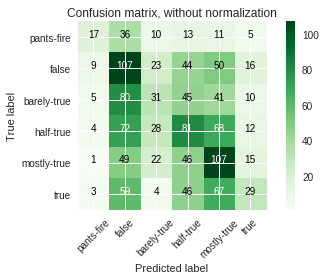

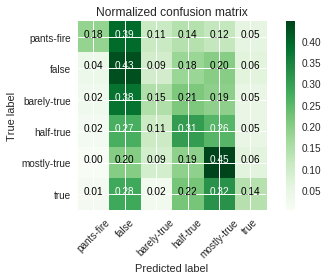

In [0]:
from sklearn.metrics import confusion_matrix
def getTestScore(X_test, Y_test, model):
  pred = model.predict(X_test)
  Y_test = [np.argmax(a) for a in Y_test]
  pred = [np.argmax(a) for a in pred]
  target_names = ['pants-fire', 'false', 'barely-true', 'half-true', 'mostly-true','true']
  print(classification_report(Y_test, pred, target_names=target_names))
  # Compute confusion matrix
  cnf_matrix = confusion_matrix(Y_test, pred)
  np.set_printoptions(precision=2)

  # Plot non-normalized confusion matrix
  plt.figure()
  plot_confusion_matrix(cnf_matrix, classes=target_names,
                        title='Confusion matrix, without normalization')

  # Plot normalized confusion matrix
  plt.figure()
  plot_confusion_matrix(cnf_matrix, classes=target_names, normalize=True,
                        title='Normalized confusion matrix')

  plt.show()
  return
model = load_model('saved_model.hdf5')
getTestScore(X_test,Y_test,model)

In [0]:
  def getBestEvidence(t):
  x=[]
  y=[]
  z=[]
  with open('notun_test(3).json', 'r') as f:
    dataset = f.read().split('\n')
    dataset = json.loads(dataset[0])
    x = eval(dataset)
  with open('notun_test1.json', 'r') as f:
    dataset = f.read().split('\n')
    dataset = json.loads(dataset[0])
    y = eval(dataset) 
  with open('notun_test2.json', 'r') as f:
    dataset = f.read().split('\n')
    dataset = json.loads(dataset[0])
    z = eval(dataset)
  
  claim = []
  evidence = []
  sim = []
  id = []
  line_no = []
  for i in range(len(x)):
    c = x[i]['claim'][t]
    e = x[i]['support'][t]
    s = x[i]['sim'][t]
    ii = x[i]['id'][t]
    l = x[i]['line_no'][t]
    if(s < y[i]['sim'][t]):
      c = y[i]['claim'][t]
      e = y[i]['support'][t]
      s = y[i]['sim'][t]
      ii = y[i]['id'][t]
      l = y[i]['line_no'][t]
    if(s < z[i]['sim'][t]):
      c = z[i]['claim'][t]
      e = z[i]['support'][t]
      s = z[i]['sim'][t]
      ii = y[i]['id'][t]
      l = y[i]['line_no'][t]
    if s < 0.7:    
      claim.append(c)
      evidence.append('null')
      sim.append(s)
      id.append(ii)
      line_no.append(l)
    else:
      claim.append(c)
      evidence.append(e)
      sim.append(s)  
      id.append(ii)
      line_no.append(l)
  print(np.percentile(X_sim, 30))
  return claim, evidence, id, line_no
  

In [0]:
with open('pred.pickle', 'wb') as f:
    pickle.dump(pred, f)

In [0]:
with open('shared_task_test.jsonl', 'r') as f:
  dataset = f.read().split('\n')
  dataset.pop()
for i in range(len(dataset)):
  dataset[i] = json.loads(dataset[i])
model = load_model('model.hdf5')
Y_test = model.predict(X_test)
y = [np.argmax(temp) for temp in Y_test]
print(len(test_claimm), X_test.shape[0])
with open('predictions.jsonl', 'w') as f:
  for i in range(len(test_claimm)):
    dic={}
    dic["id"] = dataset[i]['id']
    if y[i] == 0:
      dic["predicted_label"] = "SUPPORTS"
    elif y[i] == 2:
      dic["predicted_label"] = "REFUTES"
    else:
      dic["predicted_label"] = "NOT ENOUGH INFO"
    dic["predicted_evidence"] = [[test_id[i], test_line_no[i]]]
    json.dump(dic, f)
    f.write('\n')
  

19998 19998


In [0]:
import pickle
with open('X_test.pickle', 'wb') as f:
    pickle.dump(X_test, f)

In [0]:
from google.colab import auth
auth.authenticate_user()
from googleapiclient.discovery import build
from googleapiclient.http import MediaFileUpload

drive_service = build('drive', 'v3')
file_metadata = {
  'name': 'pred.pickle',
  'mimeType': 'application/octet-stream'
}
media = MediaFileUpload('pred.pickle', 
                        mimetype='application/octet-stream',
                        resumable=True)
created = drive_service.files().create(body=file_metadata,
                                       media_body=media,
                                       fields='id').execute()
print('File ID: {}'.format(created.get('id'))) 